# Pythonで神経細胞の膜電位のシミュレーションをする．

神経細胞の膜電位の最も単純なモデルであるleaky integrate and fire (LIF) modelを使って，膜電位の動きをコンピュータシミュレーションしてみる．

## Leaky integrate and fire model
LIF modelは極めて単純である．脱分極もしくは過分極した膜電位は静止電位に戻るという性質と膜電位が閾値に達すると発火し膜電位が下がるという2つの現象を微分方程式と条件分岐でそれぞれ表しただけである．
膜電位$V$は

$\tau \frac{dV}{dt} = - V + V_0 + RI$

で表される．$\tau$は時定数(msec)，$V_0$は静止膜電位(mV)，$R$は膜の抵抗(MΩ)，$I$は入力電流(nA)である．更に，

$V = V_{\theta}$になったとき，スパイク$S=1$となり，$V = V_0$にリセットする．それ以外のときは$S=0$である．

これをPythonで実装してみる．

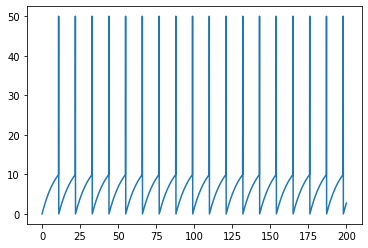

In [17]:
# 計算を楽にしてくれるライブラリを読み込み
import numpy as np
# グラフを描くライブラリを読み込み
import matplotlib.pyplot as plt

# パラメータ
h = 0.1  #刻み値
Tau = 10 #時定数
V0 = 0   #静止電位
Vth = 10 #閾値
R = 10   #抵抗
VA = 40  #スパイクの高さ

# 微分方程式の定義
def dv(v, inp):
  return((- v + V0 + R * inp)/Tau)

# Euler法
def Euler(v, inp):
  v = v + h * dv(v, inp)
  return v

# main関数
def main():
  t_0 = 0       #始まりの時間
  N = 2000      #計算する回数．
  t_end = h * N #終了の時間

  inp = 1.5; #入力

  t = np.arange(t_0, t_end + h, h) #x=0からx=100までの数(h刻み)をxに代入
  v = np.zeros(t.size)             #xの個数分yを用意（0で初期化）
  v[0] = 0                         #yの初期値を代入

  for i in range(t.size-1):
    v[i+1] = Euler(v[i], inp)

    if v[i+1] > Vth:
      v[i] += VA #活動電位が出た感じにするための処理．なくて良い．
      v[i+1] = V0

  plt.plot(t, v)      #横軸x縦軸yの線グラフを描く
  plt.show()          #グラフの表示

if __name__ == "__main__":
    main()